One last assignment! This week you have only one homework question to turn in, but you are encouraged to work on a project and apply what you've learned to it.

Create a new Jupyter Notebook (or the one provided) and use it to answer the following assignments.


Load the MovieData.csv file (one last time...) and:

a) Create a scatter-plot with Movie Budgets as the X axis, and Profit Margin (Total Revenue / Budget) as the Y axis. Resize the Y axis as needed to convey the most information. (5 points)

b) Create two time series: one a count of movies released by month-year (Jan-1990, Feb-1990, etc.), the other those movies' average profitability. Plot both series either in two aligned subplots or in a single subplot with a secondary axis. (10 points)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_date(date_str):
    '''
    Turn a MM/DD/YY string into a datetime object
    '''
    m, d, y = date_str.split("/")
    m = int(m)
    d = int(d)
    y = int(y)
    if y > 13:
        y += 1900
    else:
        y += 2000
    return dt.datetime(y, m, d)

In [3]:
movies = pd.read_csv("MovieData.csv", sep='\t', na_values=["Unknown", "Unkno"], 
                         parse_dates=[0], date_parser=make_date)

In [4]:
# Replace missing values with zeros
movies.fillna(0, inplace=True)

In [5]:
movies.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross
0,2012-03-09,John Carter,0,300000000,66439100.0,254439100.0
1,2007-05-25,Pirates of the Caribbean: At World's End,Buena Vista,300000000,309420425.0,960996492.0
2,2013-12-13,The Hobbit: There and Back Again,New Line,270000000,0.0,0.0
3,2012-12-14,The Hobbit: An Unexpected Journey,New Line,270000000,0.0,0.0
4,2010-11-24,Tangled,Buena Vista,260000000,200821936.0,586581936.0


In [6]:
# Fill in Worldwide Gross when it's missing
#movies["Worldwide Gross"][movies["Worldwide Gross"]==0] = movies["US Gross"]
#movies["Worldwide Gross"][movies["Worldwide Gross"]==0] = movies["Worldwide Gross"].mean()


In [11]:
movies["Profit Margin"] = movies["Worldwide Gross"] / movies["Budget"]
movies["Average_Profitability"] = (movies["Worldwide Gross"] - movies["Budget"]) / len(movies["Budget"])
movies.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Average_Profitability,Profit Margin
0,2012-03-09,John Carter,0,300000000,66439100.0,254439100.0,-12561.593604,0.848130
1,2007-05-25,Pirates of the Caribbean: At World's End,Buena Vista,300000000,309420425.0,960996492.0,182243.311828,3.203322
2,2013-12-13,The Hobbit: There and Back Again,New Line,270000000,0.0,0.0,-74441.687345,0.000000
3,2012-12-14,The Hobbit: An Unexpected Journey,New Line,270000000,0.0,0.0,-74441.687345,0.000000
4,2010-11-24,Tangled,Buena Vista,260000000,200821936.0,586581936.0,90041.890267,2.256084


In [12]:
movies["Budget"].max()

300000000

In [13]:
movies["Budget"].min()

1100

In [14]:
movies["Profit Margin"].max()

13112.1104

In [15]:
movies["Profit Margin"].min()

0.0

(-3, 235)

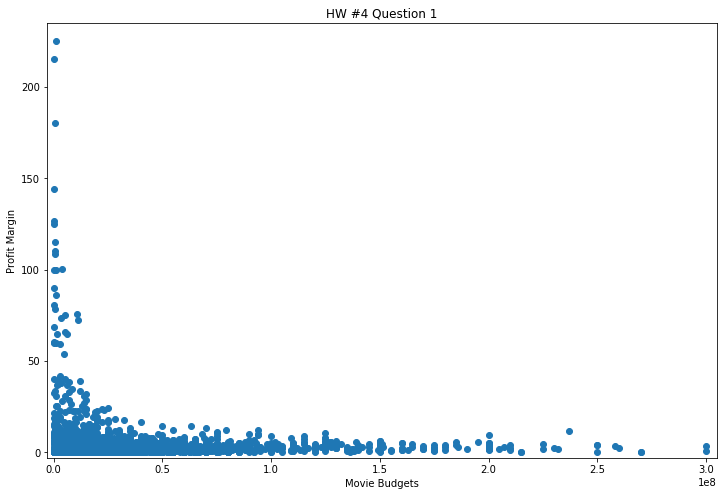

In [16]:
#Create a scatter-plot with Movie Budgets as the X axis, 
#and Profit Margin (Total Revenue / Budget) as the Y axis. 
#Resize the Y axis as needed to convey the most information.
x_axis = movies["Budget"]
y_axis = movies["Profit Margin"]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title("HW #4 Question 1")
ax.set_xlabel("Movie Budgets")
ax.set_ylabel("Profit Margin")
ax.scatter(x_axis, y_axis)

ax.set_xlim(-3000000, 305000000)
ax.set_ylim(-3, 235)


In [17]:
movies.dtypes

Release_Date             datetime64[ns]
Movie                            object
Distributor                      object
Budget                            int64
US Gross                        float64
Worldwide Gross                 float64
Average_Profitability           float64
Profit Margin                   float64
dtype: object

In [18]:
min(movies["Release_Date"])

Timestamp('1915-02-08 00:00:00')

In [19]:
max(movies["Release_Date"])

Timestamp('2013-12-13 00:00:00')

In [20]:
movies.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Average_Profitability,Profit Margin
0,2012-03-09,John Carter,0,300000000,66439100.0,254439100.0,-12561.593604,0.848130
1,2007-05-25,Pirates of the Caribbean: At World's End,Buena Vista,300000000,309420425.0,960996492.0,182243.311828,3.203322
2,2013-12-13,The Hobbit: There and Back Again,New Line,270000000,0.0,0.0,-74441.687345,0.000000
3,2012-12-14,The Hobbit: An Unexpected Journey,New Line,270000000,0.0,0.0,-74441.687345,0.000000
4,2010-11-24,Tangled,Buena Vista,260000000,200821936.0,586581936.0,90041.890267,2.256084


In [21]:
movies["Month"] = movies.Release_Date.apply(lambda x: x.month)

In [22]:
movies.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Average_Profitability,Profit Margin,Month
0,2012-03-09,John Carter,0,300000000,66439100.0,254439100.0,-12561.593604,0.848130,3
1,2007-05-25,Pirates of the Caribbean: At World's End,Buena Vista,300000000,309420425.0,960996492.0,182243.311828,3.203322,5
2,2013-12-13,The Hobbit: There and Back Again,New Line,270000000,0.0,0.0,-74441.687345,0.000000,12
3,2012-12-14,The Hobbit: An Unexpected Journey,New Line,270000000,0.0,0.0,-74441.687345,0.000000,12
4,2010-11-24,Tangled,Buena Vista,260000000,200821936.0,586581936.0,90041.890267,2.256084,11


In [23]:
movies["Year"] = movies.Release_Date.apply(lambda x: x.year)

In [24]:
movies.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Average_Profitability,Profit Margin,Month,Year
0,2012-03-09,John Carter,0,300000000,66439100.0,254439100.0,-12561.593604,0.848130,3,2012
1,2007-05-25,Pirates of the Caribbean: At World's End,Buena Vista,300000000,309420425.0,960996492.0,182243.311828,3.203322,5,2007
2,2013-12-13,The Hobbit: There and Back Again,New Line,270000000,0.0,0.0,-74441.687345,0.000000,12,2013
3,2012-12-14,The Hobbit: An Unexpected Journey,New Line,270000000,0.0,0.0,-74441.687345,0.000000,12,2012
4,2010-11-24,Tangled,Buena Vista,260000000,200821936.0,586581936.0,90041.890267,2.256084,11,2010


In [25]:
by_year = movies.groupby("Year")

In [42]:
#by_monthyear = movies.groupby([(movies.Year), (movies.Month)]).count()
by_monthyear = movies.groupby([(movies.Month), (movies.Year)]).count()
by_monthyear1 = by_monthyear[["Movie"]]
by_monthyear1.head()

Movie
Month Year       
1     1925      1
      1930      1
      1934      1
      1938      2
      1939      2

In [43]:
by_monthyear1.tail()

Movie
Month Year       
12    2009     25
      2010     25
      2011      9
      2012      1
      2013      1

In [56]:
by_AvgProfitability = movies.groupby([(movies.Month), (movies.Year), (movies.Average_Profitability)]).mean()
by_AvgProfitability.columns

Index(['Budget', 'US Gross', 'Worldwide Gross', 'Profit Margin'], dtype='object')

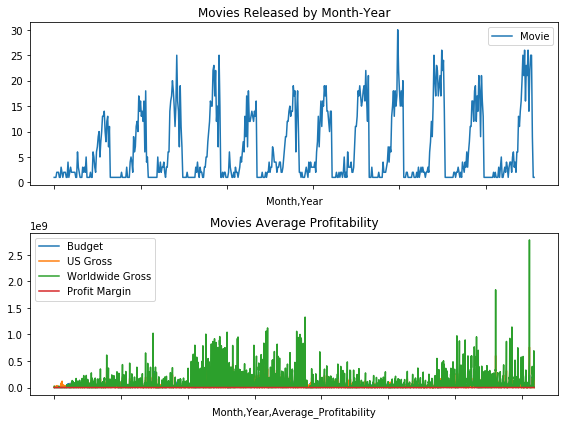

In [55]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(211)
ax1.set_title("Movies Released by Month-Year")
by_monthyear1.plot(ax=ax1)

ax2 = fig.add_subplot(212)
ax2.set_title("Movies Average Profitability")
by_AvgProfitability.plot(ax=ax2)

fig.tight_layout()

In [45]:
by_monthyear1.columns

Index(['Movie'], dtype='object')

In [52]:
by_AvgProfitability = movies.groupby([(movies.Month), (movies.Year), (movies.Average_Profitability)]).mean()

Budget     US Gross  Worldwide Gross  \
Month Year Average_Profitability                                            
1     1925  5998.070030              245000   11000000.0       22000000.0   
      1930 -1102.839813             4000000          0.0              0.0   
      1934 -89.605735                325000    2500000.0              0.0   
      1938 -551.419906              2000000    4000000.0              0.0   
           -453.267163              1644000    4000000.0              0.0   
      1939 -765.646540              2777000   28202232.0              0.0   
           -413.564930              1500000    9000000.0              0.0   
      1940 -551.419906              2000000    9172000.0              0.0   
           -355.114420              1288000    6000000.0              0.0   
      1943 -286.462641              1039000   10462500.0              0.0   
      1944 -650.951199              2361000    3500000.0              0.0   
      1945 -595.533499              2160000    9132000.0              0.0   
           -413.564930              1500000    7000000.0              0.0   
           -344.637441              1250000   11000000.0              0.0   
      1946 -876.757651              3180000    6600000.0              0.0   
           -551.419906              2000000   24464742.0              0.0   
      1947 -551.419906              2000000    7800000.0              0.0   
      1948 -1020.126827             3700000    2956000.0              0.0   
           -827.129859              3000000    9012000.0              0.0   
      1949 -441.135925              1600000    5400000.0              0.0   
           -275.709953              1000000    7800000.0              0.0   
      1952 -1102.839813             4000000   36000000.0              0.0   
           -201.268266               730000    8000000.0              0.0   
      1953 -344.637441              1250000    2500000.0              0.0   
      1954 -1378.549766             5000000   15000000.0              0.0   
      1956 -1654.259719             6000000   12500000.0              0.0   
           -1240.694789             4500000   10400000.0              0.0   
           -1102.839813             4000000   14400000.0              0.0   
           -275.709953              1000000    9000000.0              0.0   
      1957 -1378.549766             5000000   11000000.0              0.0   
...                                     ...          ...              ...   
12    2010 -5336.359526            20000000     582024.0         645024.0   
           -4789.792666            18000000          0.0         627422.0   
           -3874.553074            17000000    2231474.0        2946996.0   
           -2872.658120            12500000    2039869.0        2080869.0   
           -2729.187483            35000000    5101237.0       25101237.0   
           -1654.259719             6000000          0.0              0.0   
           -377.982355              5000000    2229058.0        3629058.0   
           -275.709953              1000000    9737892.0              0.0   
            591.311001             13000000    2037459.0       15144685.0   
            1530.597188            15000000   20218921.0       20551476.0   
            2036.295837             7000000    1785645.0       14385645.0   
            2484.765371             5000000    5198114.0       14012244.0   
            2896.527709             8000000    3205706.0       18505706.0   
            32593.606010           11000000   93617009.0      129217009.0   
            35064.588089          112000000   42779261.0      239179261.0   
            54470.020127          200000000  172062763.0      397562763.0   
            58078.459884          100000000  148438600.0      310650574.0   
            59905.411635           35000000  171243005.0      252276928.0   
            87249.704439           13000000  106954678.0      329454678.0   
      2011 -13785.497656         